In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import math

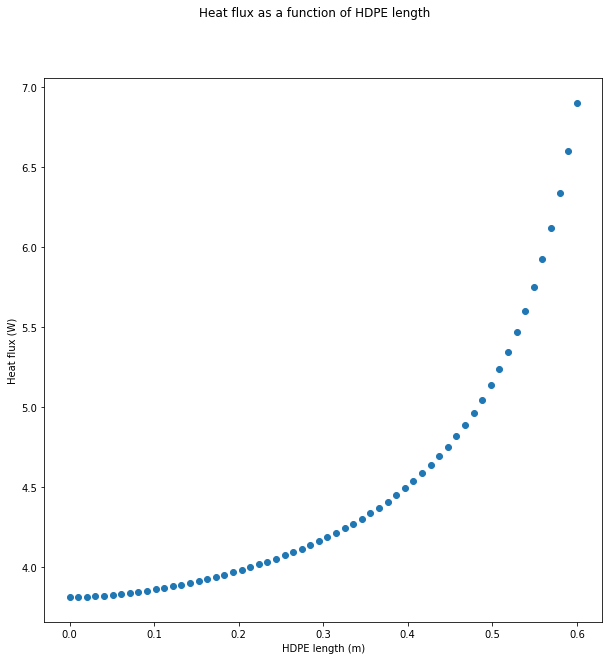

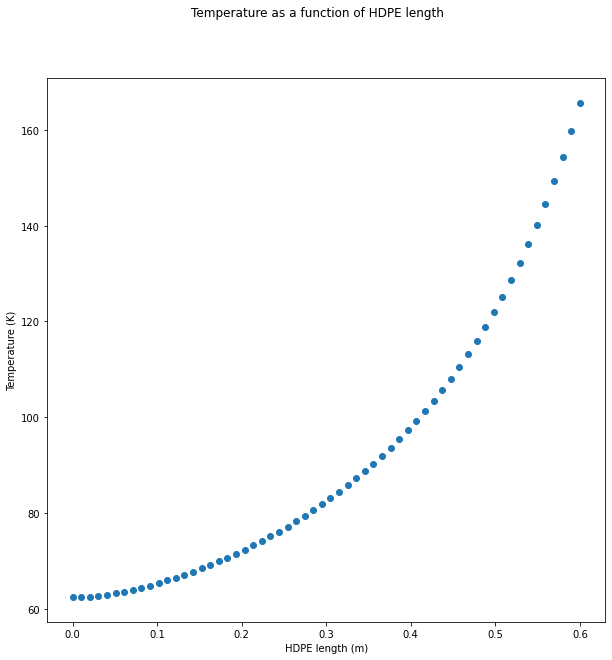

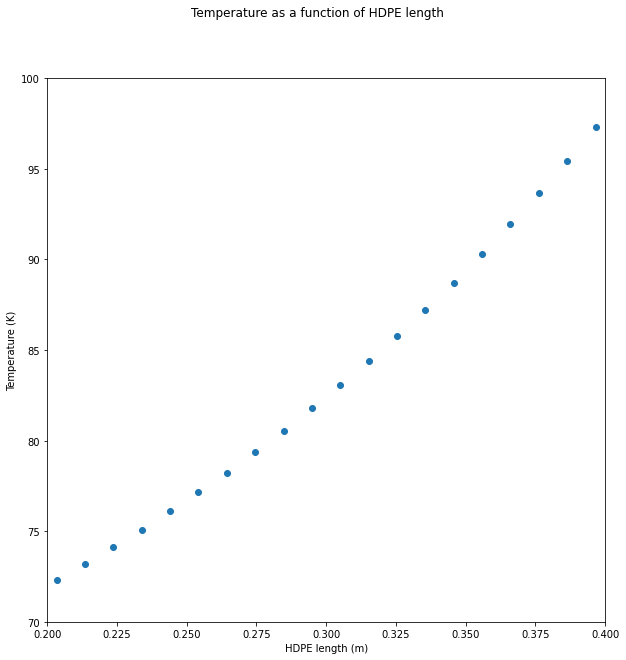

In [5]:
# Top flange simulation

# Inputs and boundary conditions
# Temperatures 
T_surface = 293 #K
T_LAr = 87 #K

# Thicknesses
t_SS = 0.0254 #m
t_HDPE = np.linspace(0.0,0.6,60) #m
t_LAr = 0.2 #m
t_GAr = 0.9144 - t_LAr - t_HDPE #m

# Diameters
D_SS = 0.30353 #m (11.95")
D_HDPE = D_SS #m
D_GAr = D_SS #m

# Thermal properties
k_SS = 14.4 #W/mK
k_GAr = 0.016 #W/mK
k_HDPE = 0.5 #W/mK

# Calculate areas
A_SS = np.pi*D_SS*t_SS + np.pi*((D_SS**2)/2) #m^2
A_HDPE = np.pi*D_HDPE*t_HDPE + np.pi*((D_HDPE**2)/2) #m^2
A_GAr = np.pi*D_GAr*t_GAr + np.pi*((D_GAr**2)/2) #m^2

# Calculate thermal resistances
R_SS = t_SS / (k_SS * A_SS) #K/W
R_HDPE = t_HDPE / (k_HDPE * A_HDPE) #K/W
R_GAr = t_GAr / (k_GAr * A_GAr) #K/W
R_tot = R_SS + R_HDPE + R_GAr

# Calculate heat flux
Q = (T_surface - T_LAr) / R_tot

# Plot the heat flux as a function of HDPE length

QvL = plt.figure(figsize=(10,10))
QvL.suptitle ("Heat flux as a function of HDPE length")
QvL = plt.xlabel("HDPE length (m)")
QvL = plt.ylabel("Heat flux (W)")
QvL = plt.scatter(t_HDPE,Q)
QvL = plt.show()

# Our area of interest lies within 0.1-0.4m so find the average heat flux
Q_Avg = np.sum(Q[9:50])/41

# Solve for temeprature as a function of HDPE length
T = T_surface - Q_Avg*R_tot

# Plot the final temperature as a function of HDPE length
TvL = plt.figure(figsize=(10,10))
TvL.suptitle ("Temperature as a function of HDPE length")
TvL = plt.xlabel("HDPE length (m)")
TvL = plt.ylabel("Temperature (K)")
TvL = plt.scatter(t_HDPE,T)
TvL = plt.show()

# Plot the final temperature as a function of HDPE length
TvL = plt.figure(figsize=(10,10))
TvL.suptitle ("Temperature as a function of HDPE length")
TvL = plt.xlabel("HDPE length (m)")
TvL = plt.ylabel("Temperature (K)")
TvL = plt.xlim(0.2,0.4)
TvL = plt.ylim(70,100)
TvL = plt.scatter(t_HDPE,T)
TvL = plt.show()

In [6]:
# Vacuum jacket simulation

# Inputs and boundary conditions
# Temperatures
T_surface = 293 #K
T_LAr = 87 #K
T_w1 = 293 #K
T_w2 = 90 #K

# Radii
# Inner Dewar
r_ii = 0.151765 #m
r_io = 0.1520698 #m

# Outer Dewar 
r_oi = 0.1600327 #m
r_oo = 0.1603375 #m

# Height of dewar 
H = 0.9144 #m 

# Thermal/material properties 
k_SS = 14.4 #W/mK
eps = 0.4 #emissivity (unitless)
sig = 5.67E-8 #W/m^2K^4

# Calculate the area of the vacuum jacket
A_vj = 2*np.pi*(r_oi-r_io)*H

# Calculate thermal resistances
R_id = (math.log(r_io/r_ii)) / (2*np.pi*H*k_SS)
R_od = (math.log(r_oo/r_oi)) / (2*np.pi*H*k_SS)
R_vj = 1/(eps*sig*A_vj*(T_w1**2+T_w2**2)*(T_w1+T_w2))
R_tot = R_id + R_od + R_vj 

# Calculate the heat flux 
Q = (T_surface - T_LAr) / R_tot
print("Heat flux is: ", Q, "W.")

# Vary heat flux to determine effects, lower flux = less cooling/heat deposition
Q_low = 7 #w
Q_high = 8 #W

# Calculate inner temperature based on varied heat flux
T_low = T_surface - Q_low*R_tot
T_high = T_surface - Q_high*R_tot
print("Final temperature is:", T_low,"K based on a lower heat flux (7W).")
print("Final temperature is:", T_high,"K based on a higher heat flux (8W).")

Heat flux is:  7.691088128345271 W.
Final temperature is: 105.51027475741009 K based on a lower heat flux (7W).
Final temperature is: 78.72602829418295 K based on a higher heat flux (8W).
